<a href="https://colab.research.google.com/github/iamharkirat/EDA/blob/main/learning_enterprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
# load data
df=pd.read_csv('/content/Data Reporter Assignment.csv')
df.head()

,Student,Partner,Course Prefix,Term,Course Start Date,Course End Date,Number of Credits,Course Enrollment,Enrollment Date,Enrollment Mode,Verified Date,Grade,Final Grade,Credit Eligible,Credit Converted,Date Added To Transcript
0,student-03-221,Acorn College,ENG 102,2201B,3/17/20,5/22/20,3,CE-109-71,12/15/19,credit,12/20/19,100.0,A,Y,Y,5/17/20
1,student-87-161,Advanced Youth Initiative,AST 111,2201A,1/14/20,3/25/20,4,CE-852-75,1/23/20,credit,1/23/20,100.0,A,Y,Y,4/15/20
2,student-14-224,Acorn College,ENG 102,2201B,3/17/20,5/22/20,3,CE-476-72,12/28/19,credit,12/27/19,100.0,A,Y,Y,5/17/20
3,student-18-260,Acorn College,HST 102,2207B,10/13/20,12/9/20,3,CE-442-120,8/12/20,verified,8/12/20,100.0,A,Y,NaN,NaN
4,student-36-195,Lucerne Corp,SOC 101,2204A,4/14/20,6/19/20,3,CE-286-89,4/14/20,credit,4/20/20,100.0,A,Y,Y,6/7/20


In [68]:
# convert date columns to datetime format
date_columns = ['Course Start Date', 'Course End Date', 'Enrollment Date', 'Verified Date', 'Date Added To Transcript']

for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce', format='%m/%d/%y')

In [69]:
df.head()

,Student,Partner,Course Prefix,Term,Course Start Date,Course End Date,Number of Credits,Course Enrollment,Enrollment Date,Enrollment Mode,Verified Date,Grade,Final Grade,Credit Eligible,Credit Converted,Date Added To Transcript
0,student-03-221,Acorn College,ENG 102,2201B,2020-03-17,2020-05-22,3,CE-109-71,2019-12-15,credit,2019-12-20,100.0,A,Y,Y,2020-05-17
1,student-87-161,Advanced Youth Initiative,AST 111,2201A,2020-01-14,2020-03-25,4,CE-852-75,2020-01-23,credit,2020-01-23,100.0,A,Y,Y,2020-04-15
2,student-14-224,Acorn College,ENG 102,2201B,2020-03-17,2020-05-22,3,CE-476-72,2019-12-28,credit,2019-12-27,100.0,A,Y,Y,2020-05-17
3,student-18-260,Acorn College,HST 102,2207B,2020-10-13,2020-12-09,3,CE-442-120,2020-08-12,verified,2020-08-12,100.0,A,Y,NaN,NaT
4,student-36-195,Lucerne Corp,SOC 101,2204A,2020-04-14,2020-06-19,3,CE-286-89,2020-04-14,credit,2020-04-20,100.0,A,Y,Y,2020-06-07


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24191 entries, 0 to 24190
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Student                   24191 non-null  object        
 1   Partner                   24191 non-null  object        
 2   Course Prefix             24191 non-null  object        
 3   Term                      24191 non-null  object        
 4   Course Start Date         24191 non-null  datetime64[ns]
 5   Course End Date           24191 non-null  datetime64[ns]
 6   Number of Credits         24191 non-null  int64         
 7   Course Enrollment         24191 non-null  object        
 8   Enrollment Date           24191 non-null  datetime64[ns]
 9   Enrollment Mode           24191 non-null  object        
 10  Verified Date             18484 non-null  datetime64[ns]
 11  Grade                     13224 non-null  float64       
 12  Final Grade       

In [71]:
df.isna().sum()

Student                         0
Partner                         0
Course Prefix                   0
Term                            0
Course Start Date               0
Course End Date                 0
Number of Credits               0
Course Enrollment               0
Enrollment Date                 0
Enrollment Mode                 0
Verified Date                5707
Grade                       10967
Final Grade                 17608
Credit Eligible             17767
Credit Converted            19451
Date Added To Transcript    19451
dtype: int64

# EDA

## Digging into the Courses data

## Which is the most taken course?

In [72]:
df['Course Prefix'].value_counts()

SOC 101    2624
ENG 101    2220
ASM 246    2119
COM 100    2017
HST 102    1960
ENG 102    1746
EXW 100    1705
CIS 105    1479
AST 111    1438
ECN 211     940
ECN 212     905
CSE 110     778
HEP 100     706
MAT 117     614
CEE 181     519
PAF 112     491
CHM 114     471
CPP 112     329
MAT 265     324
MAT 170     295
MAT 210     206
FSE 100     164
FSE 150     141
Name: Course Prefix, dtype: int64

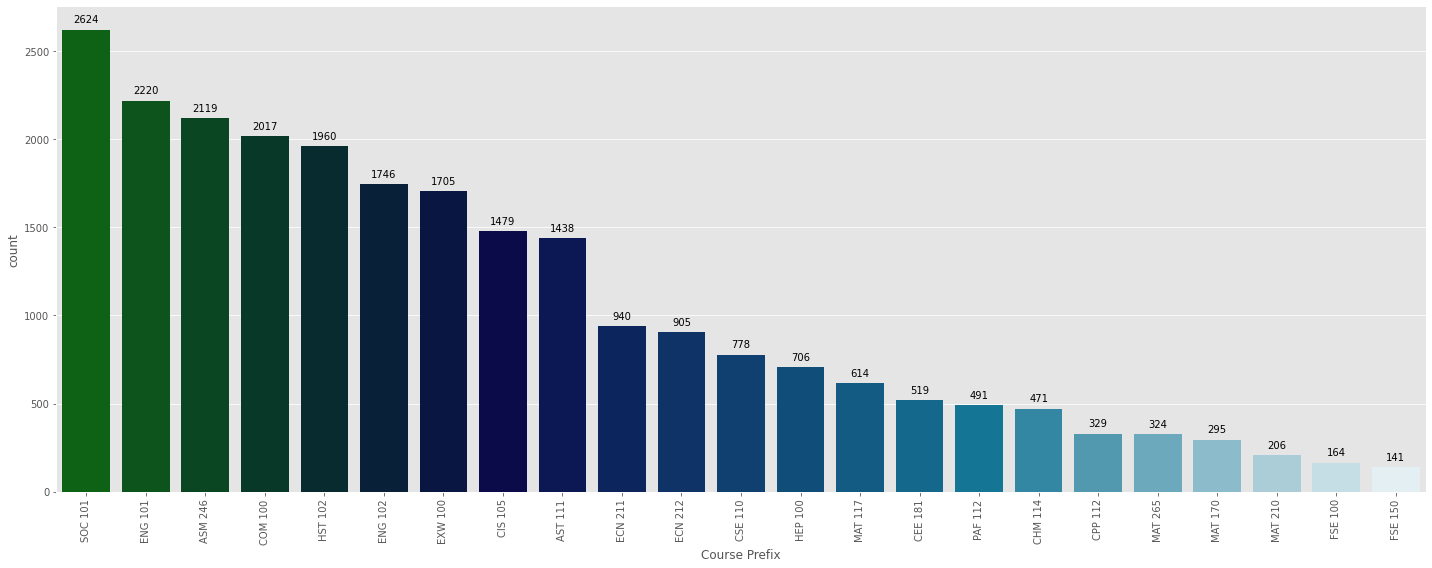

In [73]:
value_counts = df['Course Prefix'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Course Prefix', data=df, order=value_counts.index, palette='ocean')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

We can see the top couses taken by students
- SOC 101 is the most taken course
- FSE 150 is the least taken couse

## Which term did the students enroll in the most

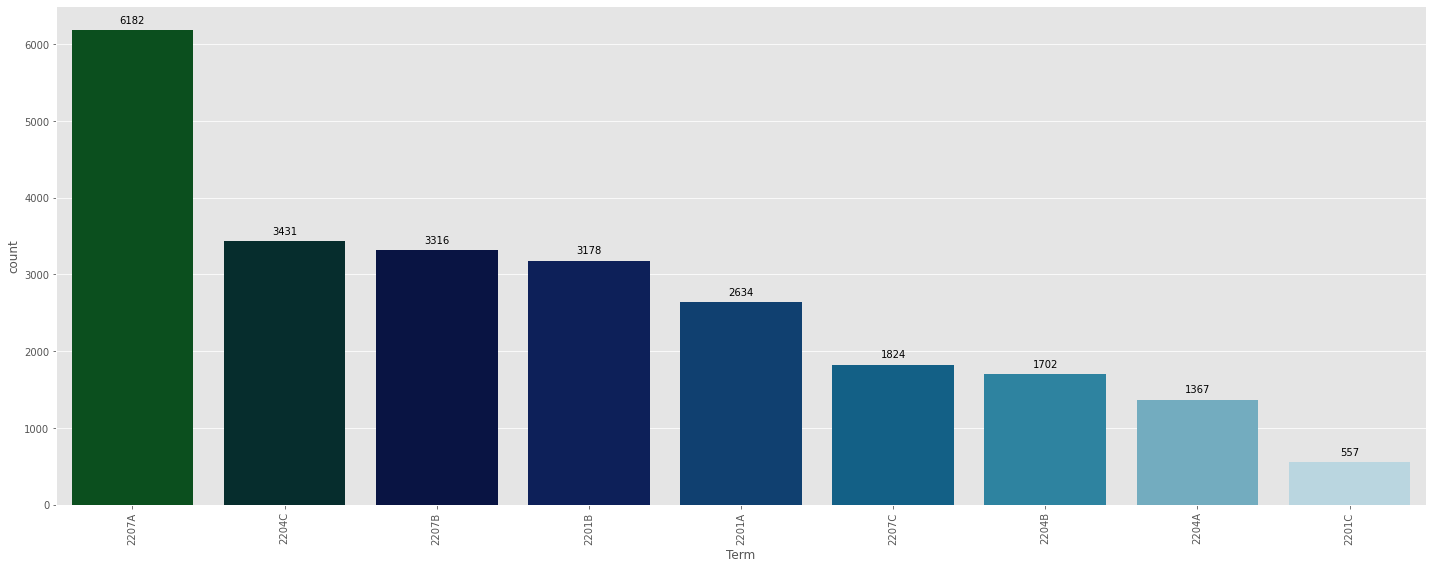

In [74]:
value_counts = df['Term'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Term', data=df, order=value_counts.index, palette='ocean')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

## Distribution of Grades across all courses

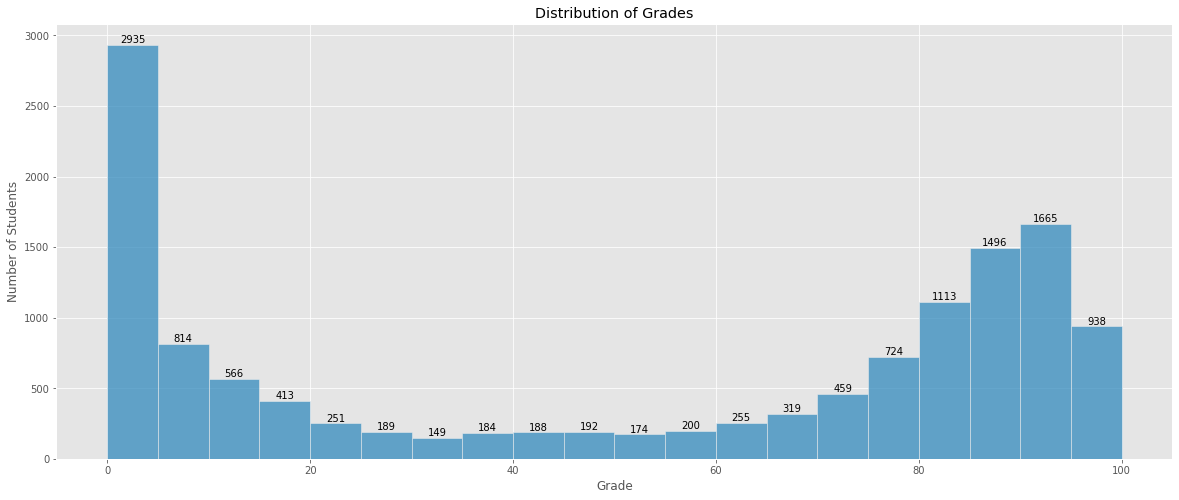

In [99]:
# Create a histogram of the grade distribution
fig, ax = plt.subplots()
sns.histplot(df['Grade'].dropna(), kde=False, bins=20, ax=ax)

# Set the x- and y-axis labels and title
ax.set_xlabel('Grade')
ax.set_ylabel('Number of Students')
ax.set_title('Distribution of Grades')
  
# Add text annotations to the bars
for rect in ax.patches:
    # Get the x and y coordinates of the bottom left corner of the bar
    x = rect.get_x()
    y = rect.get_y()
    # Get the width and height of the bar
    width = rect.get_width()
    height = rect.get_height()
    # Add the count of students to the top of the bar
    ax.text(x + width / 2, y + height, int(height), ha='center', va='bottom', color='black')

# Show the plot
plt.show()


## Courses offered per Term

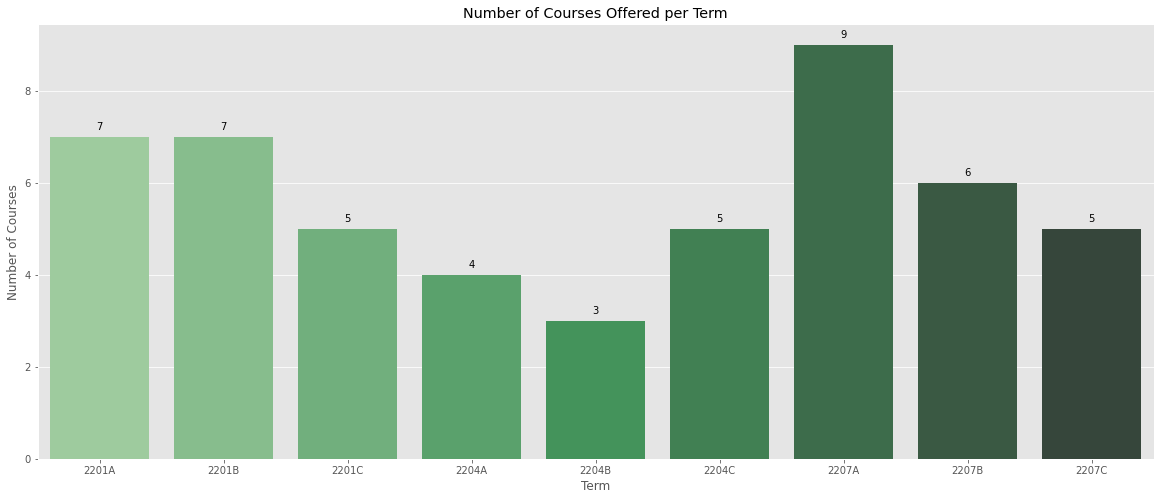

In [103]:
# Calculate the number of courses per term
num_courses_per_term = df.groupby('Term')['Course Prefix'].nunique()

# Plot the number of courses per term as a bar chart
ax=sns.barplot(x=num_courses_per_term.index, y=num_courses_per_term.values, palette='Greens_d')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set axis labels and title
plt.xlabel('Term')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered per Term')

plt.show()

## How many students enrolled in multiple courses

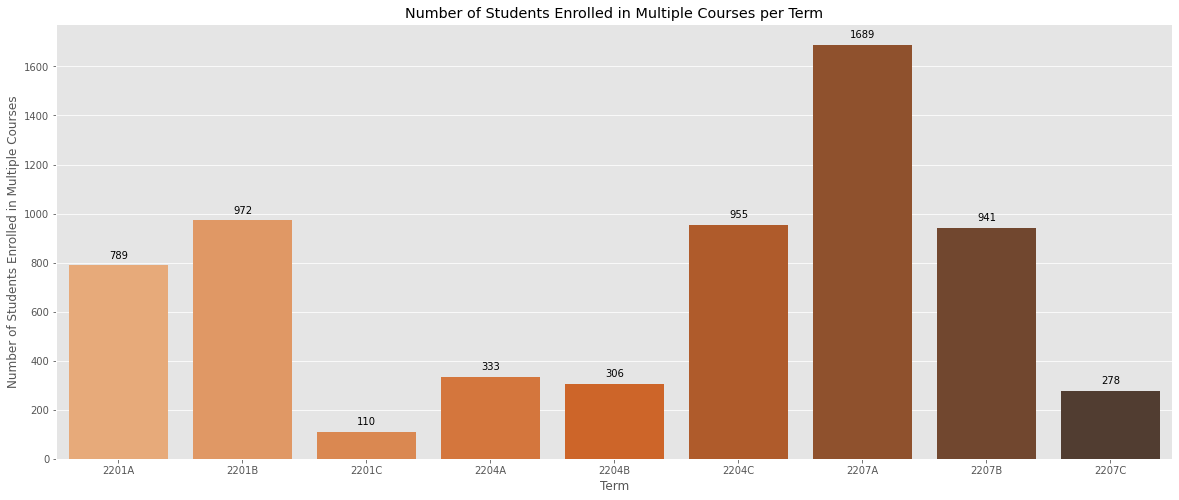

In [100]:
# Count the number of unique courses per student per term
courses_per_student_per_term = df.groupby(['Term', 'Student'])['Course Prefix'].nunique()

# Count the number of students who are enrolled in more than one course per term
multi_course_students_per_term = (courses_per_student_per_term > 1).groupby('Term').sum()

# Plot the number of students who are enrolled in more than one course per term
ax=sns.barplot(x=multi_course_students_per_term.index, y=multi_course_students_per_term.values, palette='Oranges_d')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set axis labels and title
plt.xlabel('Term')
plt.ylabel('Number of Students Enrolled in Multiple Courses')
plt.title('Number of Students Enrolled in Multiple Courses per Term')

plt.show()

## What number of credits did the students enrolled in the most

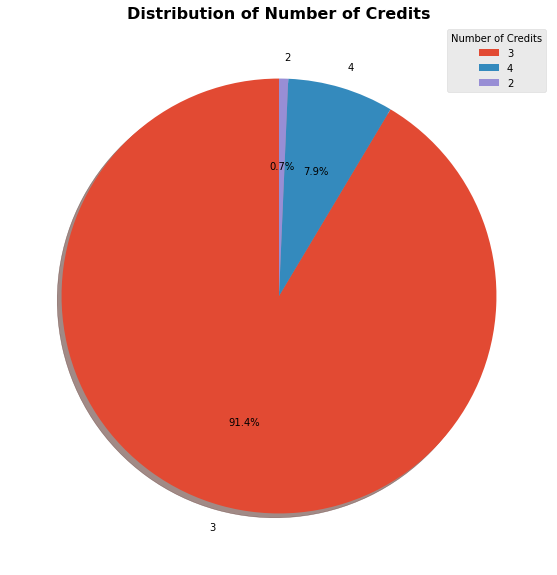

In [78]:
value_counts = df['Number of Credits'].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True)

# Add title and legend
ax.set_title('Distribution of Number of Credits', fontsize=16, fontweight='bold')
ax.legend(title='Number of Credits', loc='best')

# Set font size and weight of labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight('bold')

plt.show()

## Which enrollment mode is the most preferred

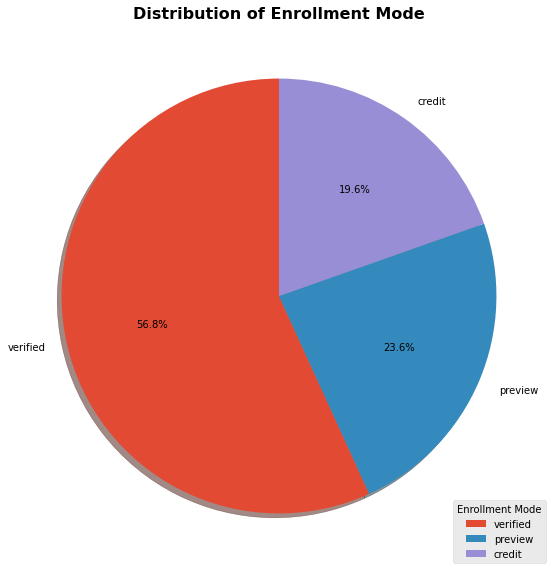

In [79]:
value_counts = df['Enrollment Mode'].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True)

# Add title and legend
ax.set_title('Distribution of Enrollment Mode', fontsize=16, fontweight='bold')
ax.legend(title='Enrollment Mode', loc='best')

# Set font size and weight of labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(30)
    label.set_fontweight('bold')

plt.show()

## Which Partner is most preferred?

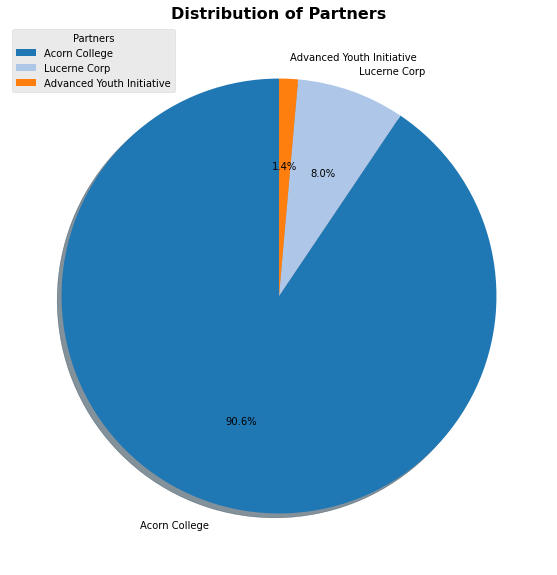

In [80]:
value_counts = df['Partner'].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True, colors=colors)

# Add title and legend
ax.set_title('Distribution of Partners', fontsize=16, fontweight='bold')
ax.legend(title='Partners', loc='best')

# Set font size and weight of labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(30)
    label.set_fontweight('bold')

plt.show()

## Distribution of Partners & Courses

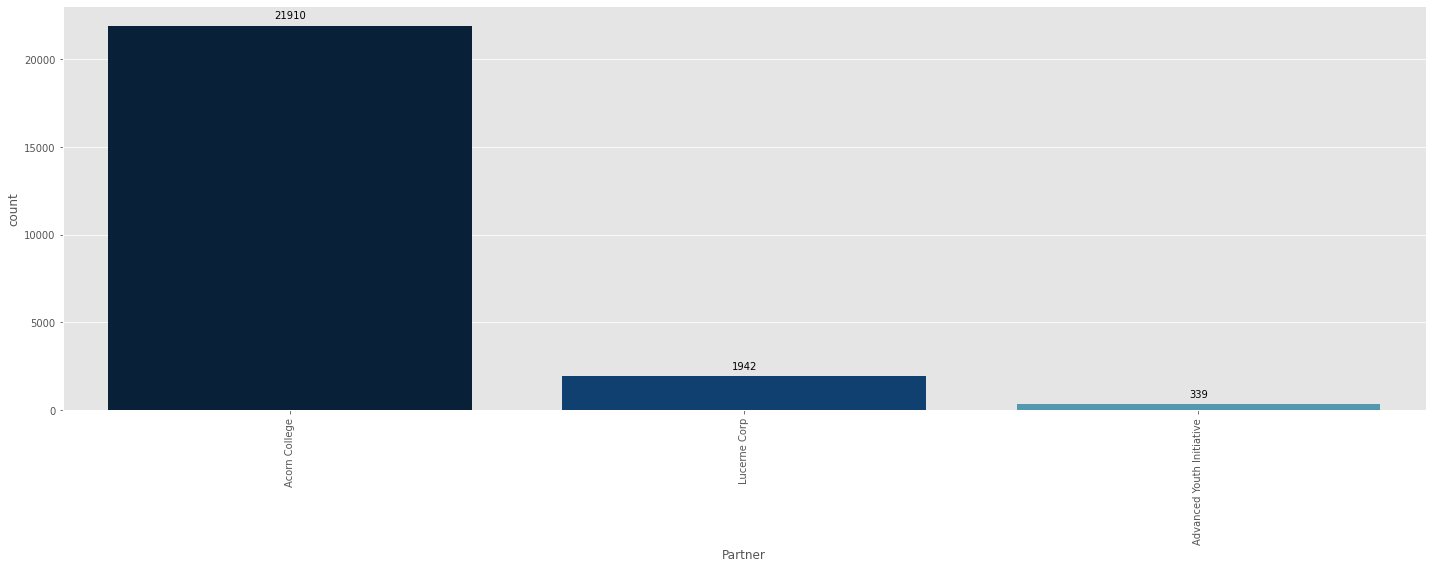

In [81]:
value_counts = df['Partner'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Partner', data=df, order=value_counts.index, palette='ocean')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

# Preview Mode Analysis

In [82]:
x=df[df['Enrollment Mode']=='preview']

## Distribution of Grades

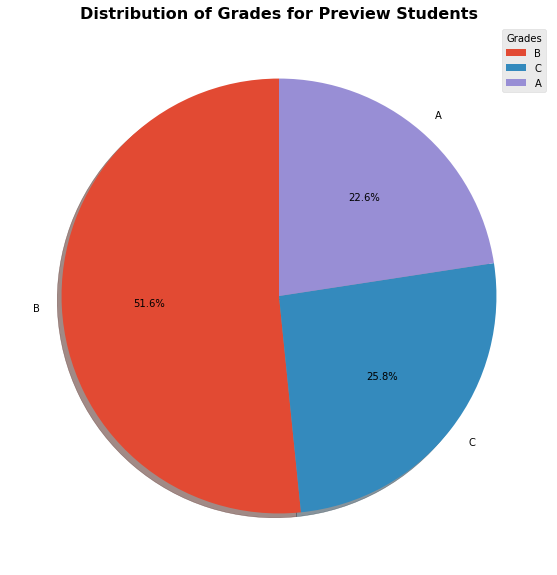

In [83]:
value_counts = x['Final Grade'].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True)

# Add title and legend
ax.set_title('Distribution of Grades for Preview Students', fontsize=16, fontweight='bold')
ax.legend(title='Grades', loc='best')

# Set font size and weight of labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(30)
    label.set_fontweight('bold')

plt.show()

## Study Outliers in this subset

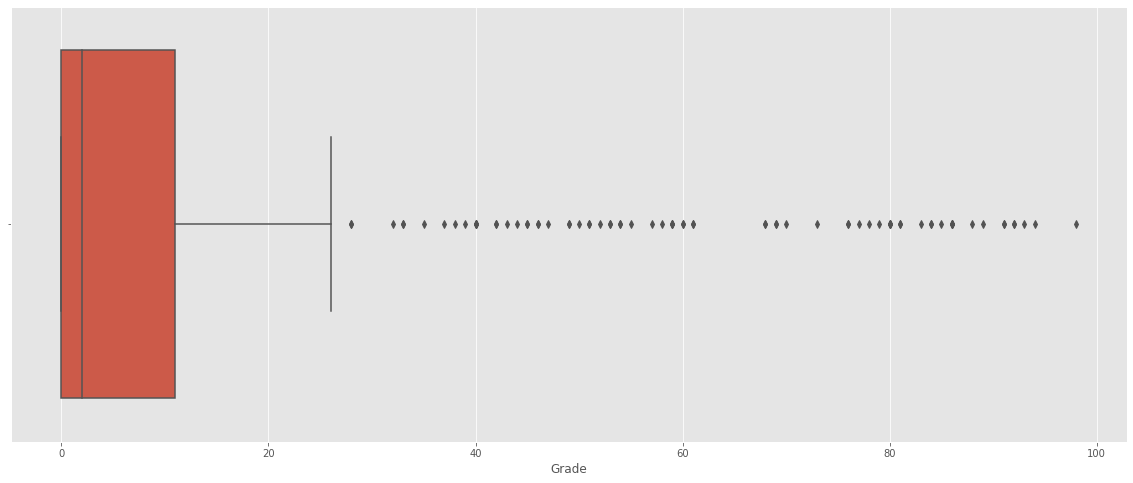

In [84]:
# Create a boxplot of the Grade variable
y = x[['Number of Credits', 'Grade']].dropna()
sns.boxplot(data=y, x='Grade');

# Verified Mode Analysis

In [85]:
x=df[df['Enrollment Mode']=='verified']

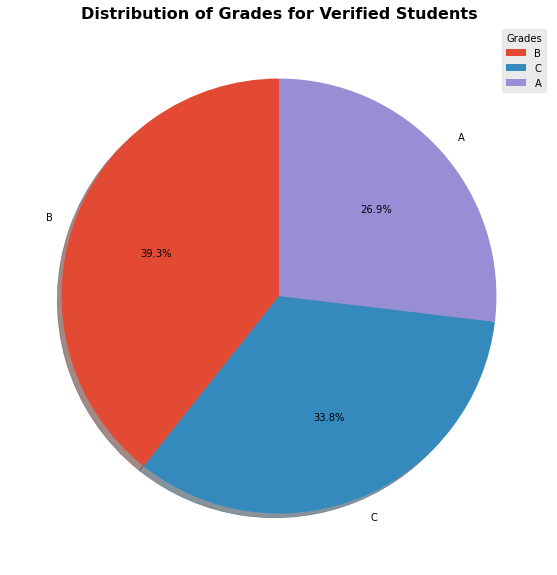

In [86]:
value_counts = x['Final Grade'].value_counts().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True)

# Add title and legend
ax.set_title('Distribution of Grades for Verified Students', fontsize=16, fontweight='bold')
ax.legend(title='Grades', loc='best')

# Set font size and weight of labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(30)
    label.set_fontweight('bold')

plt.show()

## Study Outtliers in this Subset

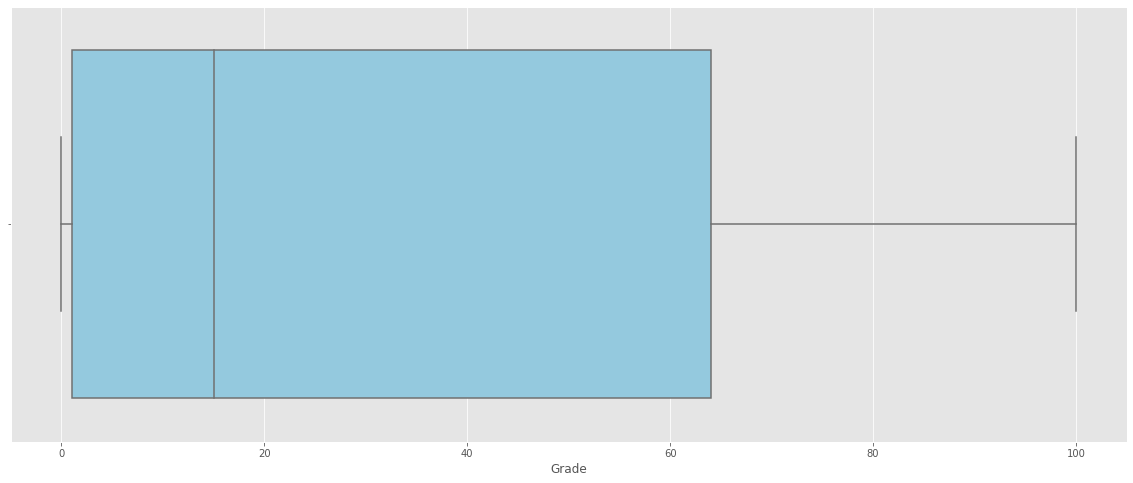

In [87]:
# Create a boxplot of the Grade variable
y = x[['Number of Credits', 'Grade']].dropna()
sns.boxplot(data=y, x='Grade', color='skyblue');

# Check Enrollment Date data

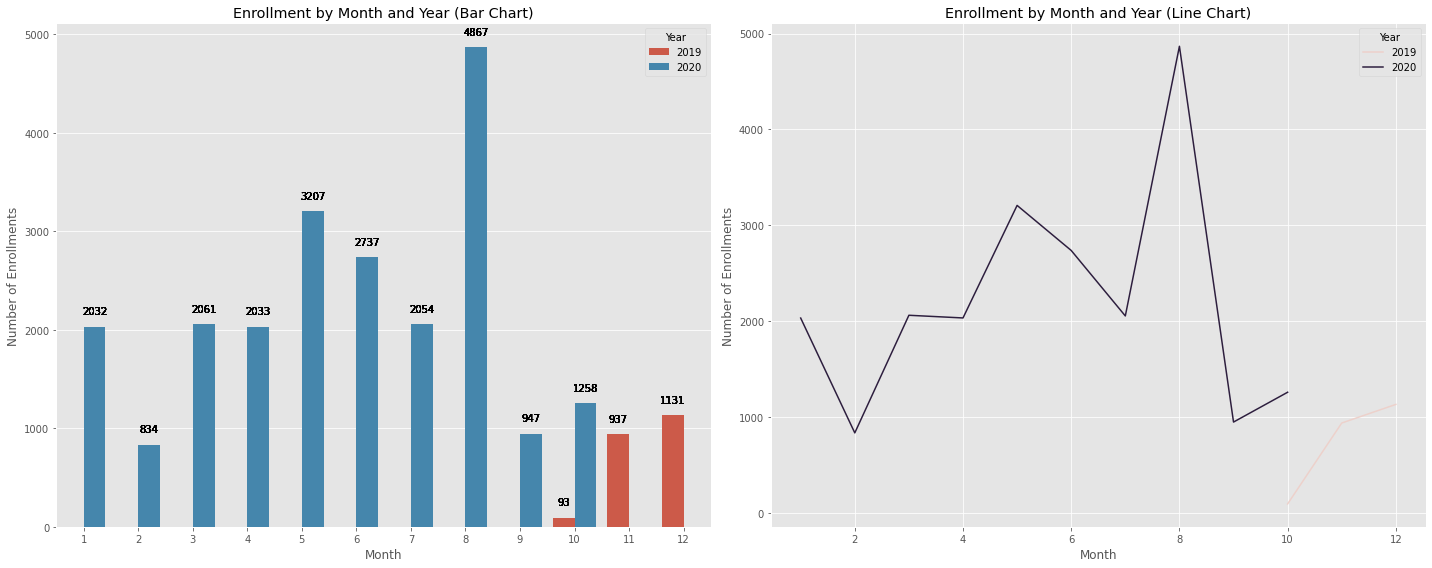

In [93]:
# Convert the Enrollment Date column to datetime format and add a month column
df['Enrollment Date'] = pd.to_datetime(df['Enrollment Date'], format='%m-%d-%y')
df['Month'] = df['Enrollment Date'].dt.month
df['Year'] = df['Enrollment Date'].dt.year

# Group by year and month and count the number of enrollments
enrollment_counts = df.groupby(['Year', 'Month'])['Student'].count().reset_index()

# Plot the enrollment counts as a bar chart and a line chart
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.barplot(x='Month', y='Student', hue='Year', data=enrollment_counts, ax=ax1)
sns.lineplot(x='Month', y='Student', hue='Year', data=enrollment_counts, ax=ax2)

# Add count values to the bars
def annotateBars(row, ax=ax1):
    for p in ax1.patches:
        ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
enrollment_counts.apply(annotateBars, ax=ax1, axis=1)

# Set axis labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Enrollments')
ax1.set_title('Enrollment by Month and Year (Bar Chart)')

ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Enrollments')
ax2.set_title('Enrollment by Month and Year (Line Chart)')

plt.tight_layout()
plt.show()